# Linear Regression.

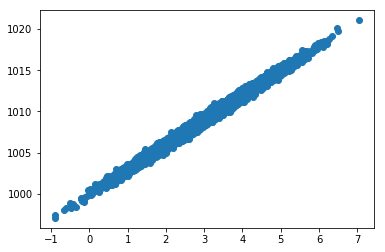

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 10000)
purchaseAmount = 1000 + (pageSpeeds - np.random.normal(0, 0.1, 10000)) * 3

scatter(pageSpeeds, purchaseAmount)

In [2]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


In [3]:
r_value ** 2

0.9900916940517582

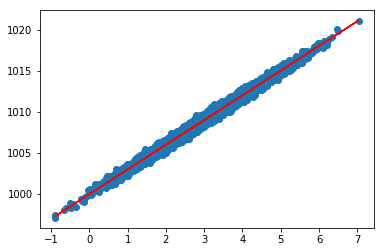

In [4]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()